# Assignment 1

### imputing missing values by the nearest neighbor

In [6]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics.pairwise import nan_euclidean_distances

In [21]:
#Reading and loading the data
data=pd.read_csv("data.csv", sep=',')
data_original = data.copy()
data.head()

,Unnamed: 0,maxO3,T9,T12,T15,Ne9,Ne12,Ne15,Vx9,Vx12,Vx15,maxO3v,WindDirection
0,20010601,87.0,15.6,18.5,NaN,4.0,4.0,8.0,0.6946,-1.7101,-0.6946,84.0,North
1,20010602,82.0,NaN,NaN,NaN,5.0,5.0,7.0,-4.3301,-4.0000,-3.0000,87.0,North
2,20010603,92.0,15.3,17.6,19.5,2.0,NaN,NaN,2.9544,NaN,0.5209,82.0,East
3,20010604,114.0,16.2,19.7,NaN,1.0,1.0,0.0,NaN,0.3473,-0.1736,92.0,North
4,20010605,94.0,NaN,20.5,20.4,NaN,NaN,NaN,-0.5000,-2.9544,-4.3301,114.0,West


In [23]:
#Seeing how much missing values are per column
data.isnull().sum(axis = 0)

Unnamed: 0        0
maxO3            16
T9               37
T12              33
T15              37
Ne9              34
Ne12             42
Ne15             32
Vx9              18
Vx12             10
Vx15             21
maxO3v           12
WindDirection     0
dtype: int64

In [72]:
#Calculate the euclidean distances where we have missing values.
#I decide to compare between columns that has similar names because they also had similar values
T = nan_euclidean_distances(data.iloc[:, 2:5], missing_values=np.nan)
Ne = nan_euclidean_distances(data.iloc[:, 5:8], missing_values=np.nan)
Vx = nan_euclidean_distances(data.iloc[:, 8:11], missing_values=np.nan)
o3Data = pd.concat([data.iloc[:, 1], data.iloc[:, 11]], axis=1)
O3 = nan_euclidean_distances(o3Data, missing_values=np.nan)
O3

array([[ 0.        ,  5.83095189,  5.38516481, ..., 16.97056275,
        15.5241747 , 17.02938637],
       [ 5.83095189,  0.        , 11.18033989, ..., 24.04163056,
        12.04159458, 12.64911064],
       [ 5.38516481, 11.18033989,  0.        , ...,  9.89949494,
        19.23538406, 22.02271555],
       ...,
       [16.97056275, 24.04163056,  9.89949494, ...,  0.        ,
        22.627417  , 41.01219331],
       [15.5241747 , 12.04159458, 19.23538406, ..., 22.627417  ,
         0.        , 20.61552813],
       [17.02938637, 12.64911064, 22.02271555, ..., 41.01219331,
        20.61552813,  0.        ]])

In [73]:
#Now we create a function to get an array of sort index 
def Nearrow(g,r):
    
    corr = g[r].copy()
    nrow = np.argsort(corr)
    
    return nrow

In [75]:
T

array([[0.        ,        nan, 1.161895  , ...,        nan,        nan,
        0.17320508],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [1.161895  ,        nan, 0.        , ...,        nan,        nan,
        1.61245155],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [0.17320508,        nan, 1.61245155, ...,        nan,        nan,
        0.        ]])

In [79]:
# Then create a loop to impute the values
array = np.array([T, Ne, Vx, O3])
for a in array:
    for (i,j),x in np.ndenumerate(a):   
        if np.isnan(x):
            nrow = Nearrow(T,i)
            for row in nrow:
                if not np.isnan(T[row, j]):
                    newvalue = T[row,j]
                    T[i,j] = newvalue
                    break


In [85]:
T

array([[0.        ,        nan, 1.161895  , ...,        nan,        nan,
        0.17320508],
       [0.        ,        nan, 1.161895  , ...,        nan,        nan,
        0.17320508],
       [1.161895  ,        nan, 0.        , ...,        nan,        nan,
        1.61245155],
       ...,
       [0.        ,        nan, 1.161895  , ...,        nan,        nan,
        0.17320508],
       [0.        ,        nan, 1.161895  , ...,        nan,        nan,
        0.17320508],
       [0.17320508,        nan, 1.61245155, ...,        nan,        nan,
        0.        ]])

In [ ]:
#Not the hole Null values are imputed because there are null values in the same row.

In [108]:
data_trans = data_original.copy()

feature_list = ["maxO3","T9","T12","T15","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","maxO3v"]

In [109]:
for i in range(11):
    feature = feature_list[i]
    imp = data.iloc[:,i]
    data_trans[feature] = imp

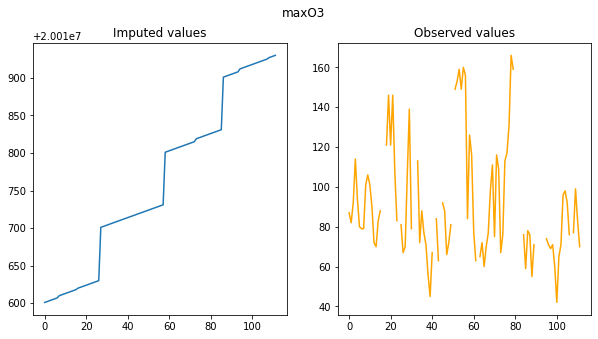

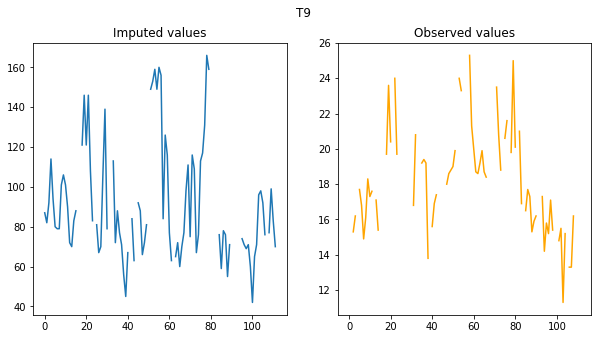

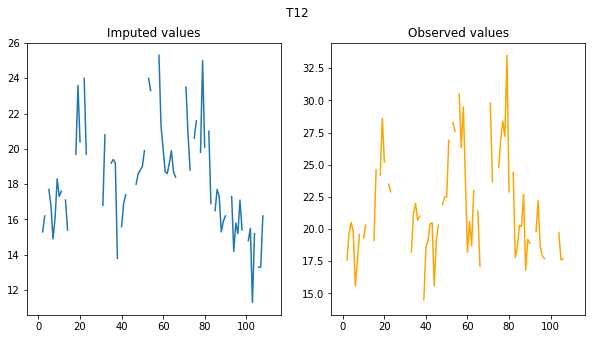

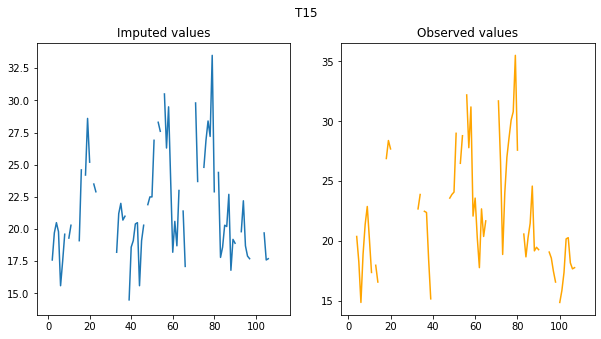

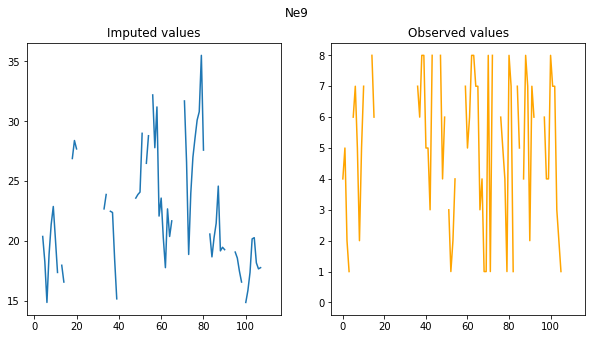

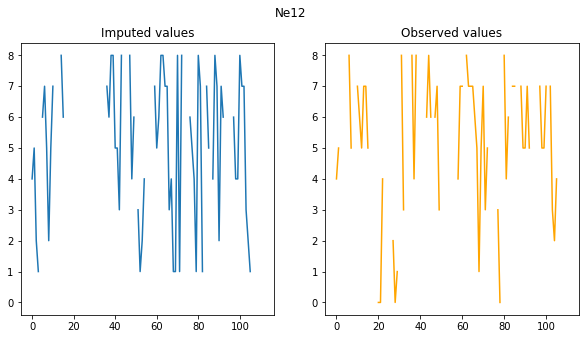

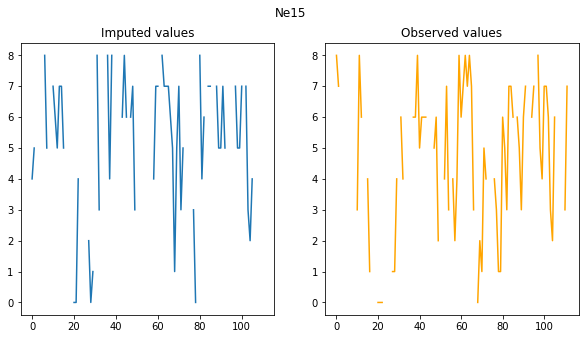

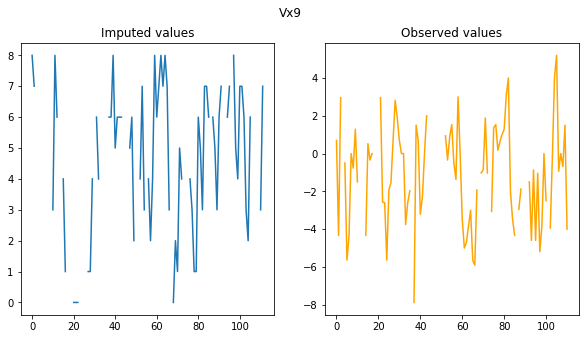

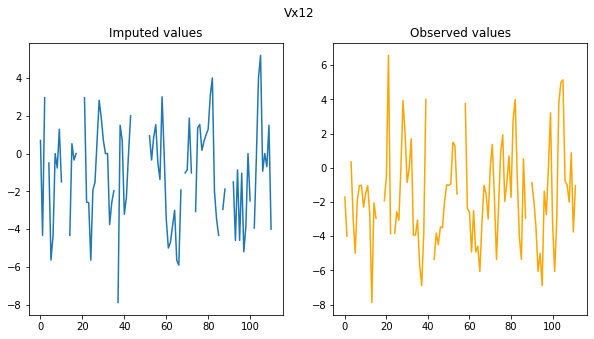

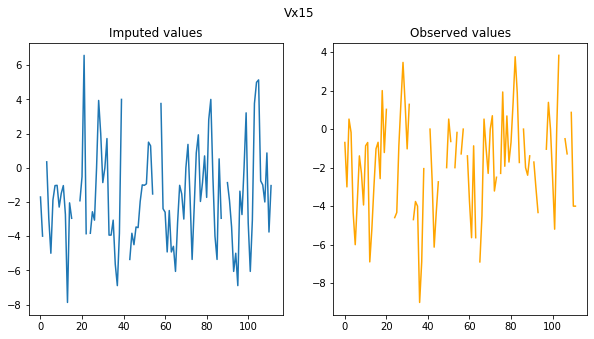

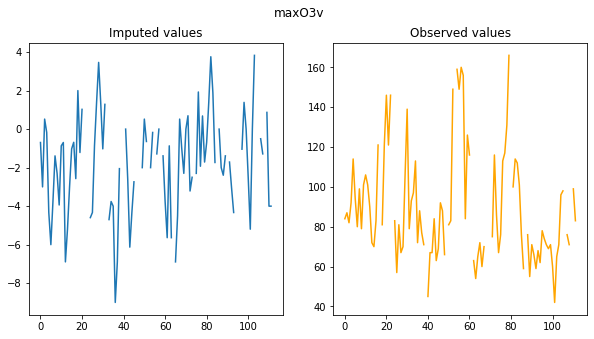

In [110]:
feature_list = ["maxO3","T9","T12","T15","Ne9","Ne12","Ne15","Vx9","Vx12","Vx15","maxO3v"]

for i in range(11):
    feature = feature_list[i]
    imp = data_trans[feature]
    obs = data_original[feature]


    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
    ax1.plot(imp)
    ax1.set_title("Imputed values")
    ax2.plot(obs,color="orange")
    ax2.set_title("Observed values")
    plt.suptitle(feature)